In [26]:
from biograph.protein import Protein
import biograph.graph_models
import importlib

importlib.reload(biograph.graph_models)
importlib.reload(biograph.protein)

Protein = biograph.protein.Protein
graph_models = biograph.graph_models

In [27]:
p = Protein.fetch("6F1T")

/usr/local/lib/python3.6/dist-packages/biograph/protein.py:25: UserWarning: suppress_bio_warnings=True, ignoring Bio's warnings.
  warnings.warn("suppress_bio_warnings=True, ignoring Bio's warnings.")


In [92]:
#p.discard_ligands()

In [28]:
p.df.shape

(92795, 13)

In [29]:
scgg = graph_models.StaticContactGraphGenerator()
p.generate_graph(scgg, {"save_contact_filename":"6F1T_contacts.tsv"})

need to add the features!

No está coord porque se hace un groupby, mean del residuo. No seria mejor quedarse con el carbono alfa?
No estoy seguro de si se puede identificar. Sólo tengo el elemento (N, C, C, O), bfactor y xyz. No hay info de las uniones químicas.
Pero aún así tengo que poder insertar los valores constantes!

In [8]:
import numpy as np
import pandas as pd

pd.api.types.is_numeric_dtype(p.df.dtypes.to_dict()["bfactor"] )

True

In [39]:
columns = ["x", "y", "z", "bfactor", "chain", "occupancy"]
dataframe = p.df
aggfn = {    
    col: "mean" if pd.api.types.is_numeric_dtype(dtype) else lambda L: L.iloc[0]
    for col, dtype in dataframe.dtypes.to_dict().items()
    if col in columns
}
dataframe.groupby(["res_full_id", "resname"]).agg(aggfn).reset_index()

,res_full_id,resname,bfactor,chain,occupancy,x,y,z
0,"(6F1T, 0, A, ( , 7, ))",ILE,450.42,A,1.0,350.975128,445.474396,450.116119
1,"(6F1T, 0, A, ( , 8, ))",ALA,463.31,A,1.0,347.411804,443.886200,448.607788
2,"(6F1T, 0, A, ( , 9, ))",ASN,422.15,A,1.0,350.012756,442.023254,446.758636
3,"(6F1T, 0, A, ( , 10, ))",GLN,372.22,A,1.0,350.680115,436.617889,445.950012
4,"(6F1T, 0, A, ( , 11, ))",PRO,357.59,A,1.0,351.561127,435.803131,449.801697
...,...,...,...,...,...,...,...,...
13992,"(6F1T, 0, z, ( , 1049, ))",UNK,59.87,z,1.0,447.013397,460.796783,396.774414
13993,"(6F1T, 0, z, ( , 1050, ))",UNK,31.90,z,1.0,447.548004,464.418610,397.839600
13994,"(6F1T, 0, z, ( , 1051, ))",UNK,19.43,z,1.0,450.985016,464.152985,398.450195
13995,"(6F1T, 0, z, ( , 1052, ))",UNK,12.21,z,1.0,452.670807,463.250610,395.199799


In [84]:
scgg.G.nodes["A:ALA:8"]

KeyError: 'A:ALA:8'

In [30]:
scgg.add_features(
    p.df, columns = [
        "x", "y", "z", "bfactor", "chain", "occupancy"])

In [31]:
import biograph.constants 
valid_amino_3 = biograph.constants.valid_amino_3
len(p.df.res_full_id[p.df.resname.apply(valid_amino_3, unk_valid = True)].unique())

13987

In [15]:
valid_amino_3("UNK", unk_valid=True)

True

In [98]:
scgg.G.number_of_nodes()

13694

In [103]:
p.df.resname.unique()

array(['ILE', 'ALA', 'ASN', 'GLN', 'PRO', 'VAL', 'ASP', 'GLY', 'SER',
       'LYS', 'PHE', 'TYR', 'CYS', 'ARG', 'HIS', 'MET', 'LEU', 'GLU',
       'TRP', 'THR', 'ADP', 'ATP', 'UNK'], dtype=object)

In [32]:
bad_nodes = 0
unk_nodes = 0
for node_idx in scgg.G.nodes:
    if "chain" not in scgg.G.nodes[node_idx]:
        bad_nodes +=1
        print(node_idx)
        if "UNK" in node_idx:
            unk_nodes += 1
bad_nodes, unk_nodes

(0, 0)

In [25]:
bad_nodes = 0
ids = []
for idx in scgg.G.nodes():
    values = scgg.G.nodes[idx]
    #print(values)
    if "chain" not in values.keys():
        bad_nodes += 1
        ids.append(idx)
        print(idx)
bad_nodes

2113

In [24]:
ids

['N:UNK:202',
 'N:UNK:206',
 'M:UNK:819',
 'M:UNK:823',
 'Y:UNK:290',
 'Y:UNK:416',
 'e:UNK:1023',
 'e:UNK:1025',
 'x:UNK:382',
 'x:UNK:384',
 'O:UNK:27',
 'O:UNK:33',
 'N:UNK:401',
 'N:UNK:404',
 'N:UNK:56',
 'N:UNK:60',
 'n:UNK:997',
 'n:UNK:999',
 'N:UNK:156',
 'N:UNK:160',
 'M:UNK:242',
 'M:UNK:246',
 'm:UNK:993',
 'm:UNK:995',
 'M:UNK:16',
 'M:UNK:20',
 'N:UNK:233',
 'N:UNK:237',
 'N:UNK:549',
 'N:UNK:552',
 'N:UNK:256',
 'N:UNK:258',
 'N:UNK:158',
 'M:UNK:118',
 'M:UNK:120',
 'z:UNK:1008',
 'z:UNK:1011',
 'x:UNK:342',
 'x:UNK:344',
 'Q:UNK:2',
 'Q:UNK:6',
 'M:UNK:169',
 'M:UNK:367',
 'M:UNK:248',
 'M:UNK:250',
 'M:UNK:69',
 'M:UNK:72',
 'R:UNK:15',
 'R:UNK:18',
 'M:UNK:474',
 'M:UNK:476',
 'M:UNK:240',
 'M:UNK:243',
 'N:UNK:149',
 'N:UNK:151',
 'x:UNK:372',
 'x:UNK:374',
 'M:UNK:714',
 'M:UNK:716',
 'N:UNK:413',
 'N:UNK:415',
 'O:UNK:81',
 'O:UNK:85',
 'M:UNK:208',
 'M:UNK:212',
 'N:UNK:88',
 'N:UNK:92',
 'Q:UNK:52',
 'Q:UNK:54',
 'Q:UNK:11',
 'Q:UNK:7',
 'x:UNK:326',
 'x:UNK:330

In [ ]:
p.graph.number_of_nodes()

In [ ]:
p.df.res_full_id.unique().shape

### Contact graphs analysis

In [106]:
import os
import networkx as nx
import numpy as np

In [107]:
def load_graph(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)
filenames = [fn for fn in os.listdir("../graphs/contacts/") if ".pkl" in fn]
graphs = [load_graph("../graphs/contacts/"+fn) for fn in filenames]

In [108]:
import pickle
with open("../names_groups.pkl", "rb")  as f:
    names, groups = pickle.load(f)
names

{'3RRF': ['3RRF_A', '3RRF_B'],
 '5WRS': ['5WRS_A', '5WRS_B'],
 '6ILT': ['6ILT_A', '6ILT_B'],
 '2R7L': ['2R7L_A'],
 '3OVB': ['3OVB_A', '3OVB_B', '3OVB_C', '3OVB_D'],
 '3LMI': ['3LMI_A', '3LMI_B', '3LMI_C', '3LMI_D'],
 '6D3R': ['6D3R_A'],
 '1O9T': ['1O9T_A', '1O9T_B'],
 '3ZCN': ['3ZCN_A', '3ZCN_B'],
 '1B76': ['1B76_A', '1B76_B'],
 '1KJ8': ['1KJ8_A', '1KJ8_B'],
 '2RD5': ['2RD5_A', '2RD5_B', '2RD5_C', '2RD5_D'],
 '1NGF': ['1NGF_A'],
 '5ECP': ['5ECP_A', '5ECP_B', '5ECP_C', '5ECP_D', '5ECP_E', '5ECP_F'],
 '2P09': ['2P09_A'],
 '3S1A': ['3S1A_A', '3S1A_B', '3S1A_C', '3S1A_D', '3S1A_E', '3S1A_F'],
 '6AAP': ['6AAP_A'],
 '5JRJ': ['5JRJ_A'],
 '3K0F': ['3K0F_A', '3K0F_B', '3K0F_C', '3K0F_D', '3K0F_E', '3K0F_F'],
 '2IXF': ['2IXF_A', '2IXF_B', '2IXF_C', '2IXF_D'],
 '6REP': ['6REP_0',
  '6REP_1',
  '6REP_2',
  '6REP_3',
  '6REP_4',
  '6REP_5',
  '6REP_6',
  '6REP_7',
  '6REP_8',
  '6REP_9',
  '6REP_A',
  '6REP_B',
  '6REP_C',
  '6REP_D',
  '6REP_E',
  '6REP_F',
  '6REP_G',
  '6REP_H',
  '6REP_I',
  '6

In [109]:
import biograph.groupfolds
protein_group_dict = biograph.groupfolds.CDHitGroup.get_protein_groups(names, groups)
protein_ids = []
faulty_graphs = set()
faulty_nodes = 0
faulty_perc = []
for i, graph in enumerate(graphs):
    node_idx = list(graph.nodes)[0] # warning: this does not guarantee that there's information in each one
    chain = None
    nodes_missing_data = 0
    for node_idx in graph.nodes:
        if "chain" not in graph.nodes[node_idx]:
            faulty_nodes += 1
            faulty_graphs.add(i)
            nodes_missing_data += 1
        else:
            chain = graph.nodes[node_idx]["chain"]
    if chain is not None:
        protein_ids.append(chain.split("_")[0])
    faulty_perc.append(nodes_missing_data/graph.number_of_nodes())
protein_groups = [protein_group_dict.get(pdbid, -1) for pdbid in protein_ids]
"There are {} proteins without group".format(len(list(filter(lambda g: g==-1, protein_groups))))


'There are 0 proteins without group'

In [41]:
chain

{'x': 117.55799865722656,
 'y': -48.638999938964844,
 'z': 90.82599639892578,
 'bfactor': 44.09,
 'chain': '5DN6_A',
 'occupancy': 1.0,
 'distance': 29.189329147338867}

In [85]:
faulty_graph_id = list(faulty_graphs)[0]
faulty_graph = graphs[faulty_graph_id]
chain = None
print(faulty_graph.number_of_nodes(), faulty_graph.number_of_edges())
print(faulty_perc[faulty_graph_id])
faulty_nodes = []
for node_idx in faulty_graph.nodes:
    if "chain" not in faulty_graph.nodes[node_idx]:
        faulty_nodes.append(node_idx)
    elif chain is None:
        chain = faulty_graph.nodes[node_idx]["chain"]
        print("Chain is: ", chain)
faulty_protein_pdbid = chain.split("_")[0]


4654 12916
0.48238074774387624
Chain is:  5DN6_B


In [86]:
from biograph.protein import Protein
p = Protein(f"../data/{faulty_protein_pdbid}.pdb", suppress_bio_warnings=False)

/home/joaquintz/.local/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 32685.
  PDBConstructionWarning)
/home/joaquintz/.local/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 32717.
  PDBConstructionWarning)
/home/joaquintz/.local/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 32745.
  PDBConstructionWarning)
/home/joaquintz/.local/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 32777.
  PDBConstructionWarning)
/home/joaquintz/.local/lib/python3.6/site-packages/Bio/PDB/StructureBuilder.py:91: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 32809.
  PDBConstructionWarning)


In [61]:
faulty_graph.nodes[faulty_nodes[0]]

{}

In [87]:
print(faulty_nodes[0])
node_chain, node_resname, node_num = faulty_nodes[0].split(":")
p.df[(p.df.chain == node_chain) & 
     (p.df.res_full_id.apply(lambda rfi: rfi[3][1]) == int(node_num)) &
     (p.df.resname == node_resname)]

Q:GLU:60


,bfactor,chain,coord,disordered_flag,element,full_id,res_full_id,mass,resname,occupancy,x,y,z
27830,44.09,Q,"[69.293, 17.157, -26.185]",0,N,"(5DN6, 0, Q, ( , 60, ), (N, ))","(5DN6, 0, Q, ( , 60, ))",14.0067,GLU,1.0,69.292999,17.157,-26.184999
27831,44.10,Q,"[69.54, 17.789, -27.485]",0,C,"(5DN6, 0, Q, ( , 60, ), (CA, ))","(5DN6, 0, Q, ( , 60, ))",12.0107,GLU,1.0,69.540001,17.789,-27.485001
27832,44.09,Q,"[70.863, 17.296, -28.071]",0,C,"(5DN6, 0, Q, ( , 60, ), (CB, ))","(5DN6, 0, Q, ( , 60, ))",12.0107,GLU,1.0,70.862999,17.296,-28.070999
27833,44.09,Q,"[68.383, 17.5, -28.454]",0,C,"(5DN6, 0, Q, ( , 60, ), (C, ))","(5DN6, 0, Q, ( , 60, ))",12.0107,GLU,1.0,68.383003,17.500,-28.454000
27834,44.09,Q,"[68.053, 18.347, -29.293]",0,O,"(5DN6, 0, Q, ( , 60, ), (O, ))","(5DN6, 0, Q, ( , 60, ))",15.9994,GLU,1.0,68.053001,18.347,-29.292999


In [89]:
protein = p
protein.df = protein.df[~protein.df.coord.isnull()]
ATP_coords = protein.df[protein.df.resname == "ATP"].coord.to_list()

if len(ATP_coords) > 200 and args.laptop_safe:
    logger.info(f"{protein.pdb.id} - Skipping it because it would fry my laptop")
    raise Exception
if len(ATP_coords) == 0:
    # This may happen because of an oddly formatted PDB file which Bio cannot read
    # correctly.
    logger.warning(f"{protein.pdb.id} no ATP atoms found. Skipping.")
    raise Exception
protein.df["distance"] = protein.df.coord.apply(
    lambda atom: min(map(lambda atp_atom: np.linalg.norm(atom-atp_atom), ATP_coords))
)
protein.discard_ligands()
# Sanity check
protein.df = protein.df.loc[
        protein.df.apply(lambda row: row["full_id"][4][0] == "CA", axis=1),:].reset_index(drop=True)

if min(protein.df.distance) >= 6.0:
    logger.warning(f"{protein.pdb.id} no atoms are linked to ligand")
    raise Exception

# Only keep chains that are connected to the ligand.
chains_with_ligand = protein.df[protein.df.distance <= 6.0].chain.unique()
chains_with_ligand

array(['A', 'B', 'C', 'D', 'F'], dtype=object)

In [56]:
p.df[(p.df.chain == node_chain) & 
     (p.df.resname == node_resname)].res_full_id.tolist()

[('5DN6', 0, 'E', (' ', 125, ' ')),
 ('5DN6', 0, 'E', (' ', 125, ' ')),
 ('5DN6', 0, 'E', (' ', 125, ' ')),
 ('5DN6', 0, 'E', (' ', 125, ' ')),
 ('5DN6', 0, 'E', (' ', 125, ' ')),
 ('5DN6', 0, 'E', (' ', 125, ' ')),
 ('5DN6', 0, 'E', (' ', 142, ' ')),
 ('5DN6', 0, 'E', (' ', 142, ' ')),
 ('5DN6', 0, 'E', (' ', 142, ' ')),
 ('5DN6', 0, 'E', (' ', 142, ' ')),
 ('5DN6', 0, 'E', (' ', 142, ' ')),
 ('5DN6', 0, 'E', (' ', 142, ' ')),
 ('5DN6', 0, 'E', (' ', 173, ' ')),
 ('5DN6', 0, 'E', (' ', 173, ' ')),
 ('5DN6', 0, 'E', (' ', 173, ' ')),
 ('5DN6', 0, 'E', (' ', 173, ' ')),
 ('5DN6', 0, 'E', (' ', 173, ' ')),
 ('5DN6', 0, 'E', (' ', 173, ' ')),
 ('5DN6', 0, 'E', (' ', 176, ' ')),
 ('5DN6', 0, 'E', (' ', 176, ' ')),
 ('5DN6', 0, 'E', (' ', 176, ' ')),
 ('5DN6', 0, 'E', (' ', 176, ' ')),
 ('5DN6', 0, 'E', (' ', 176, ' ')),
 ('5DN6', 0, 'E', (' ', 176, ' ')),
 ('5DN6', 0, 'E', (' ', 198, ' ')),
 ('5DN6', 0, 'E', (' ', 198, ' ')),
 ('5DN6', 0, 'E', (' ', 198, ' ')),
 ('5DN6', 0, 'E', (' ', 198,

In [21]:
xbins

NameError: name 'xbins' is not defined

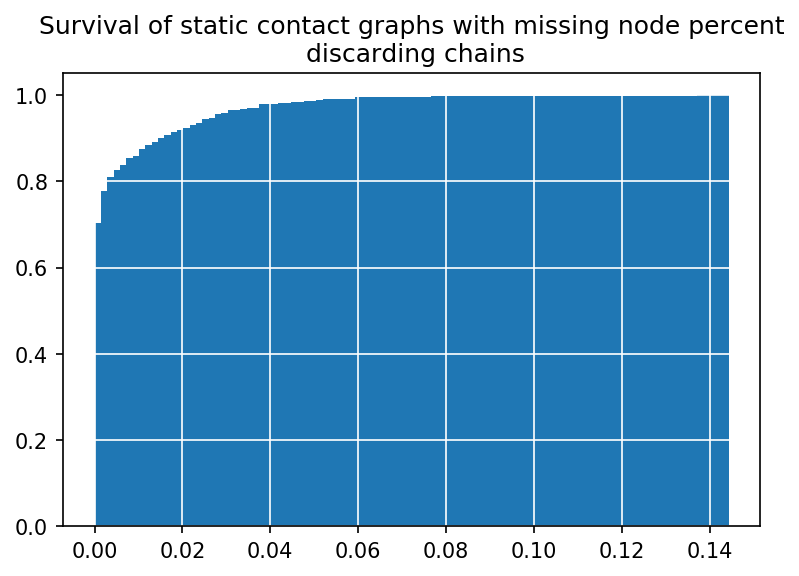

In [122]:
def load_graph(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)
filenames = [fn for fn in os.listdir("../graphs/contacts/") if ".pkl" in fn]
graphs = [load_graph("../graphs/contacts/"+fn) for fn in filenames]

import biograph.groupfolds
protein_group_dict = biograph.groupfolds.CDHitGroup.get_protein_groups(names, groups)
protein_ids = []
faulty_graphs = set()
faulty_nodes = 0
faulty_perc = []
for i, graph in enumerate(graphs):
    node_idx = list(graph.nodes)[0] # warning: this does not guarantee that there's information in each one
    chain = None
    nodes_missing_data = 0
    for node_idx in graph.nodes:
        if "chain" not in graph.nodes[node_idx]:
            faulty_nodes += 1
            faulty_graphs.add(i)
            nodes_missing_data += 1
        else:
            chain = graph.nodes[node_idx]["chain"]
    if chain is not None:
        protein_ids.append(chain.split("_")[0])
    faulty_perc.append(nodes_missing_data/graph.number_of_nodes())
protein_groups = [protein_group_dict.get(pdbid, -1) for pdbid in protein_ids]
"There are {} proteins without group".format(len(list(filter(lambda g: g==-1, protein_groups))))




import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

plt.title("Survival of static contact graphs with missing node percent\n discarding chains")
plt.xlabel("")
plt.grid(True, color="white", )
cum_perc, xbin, _ = plt.hist(faulty_perc, bins=100, cumulative=True, density=True)
#plt.xticks(xbin, labels=["{:.2f}".format(tick) for tick in xbin])
None

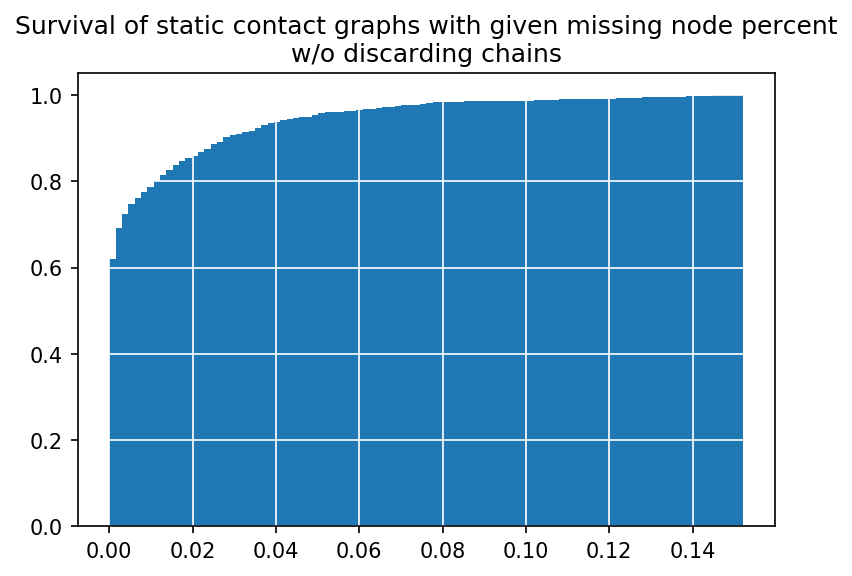

In [123]:
def load_graph(fn):
    with open(fn, "rb") as f:
        return pickle.load(f)
filenames = [fn for fn in os.listdir("../graphs/contacts_no_discard_chains/") if ".pkl" in fn]
graphs = [load_graph("../graphs/contacts_no_discard_chains/"+fn) for fn in filenames]

import biograph.groupfolds
protein_group_dict = biograph.groupfolds.CDHitGroup.get_protein_groups(names, groups)
protein_ids = []
faulty_graphs = set()
faulty_nodes = 0
faulty_perc = []
for i, graph in enumerate(graphs):
    node_idx = list(graph.nodes)[0] # warning: this does not guarantee that there's information in each one
    chain = None
    nodes_missing_data = 0
    for node_idx in graph.nodes:
        if "chain" not in graph.nodes[node_idx]:
            faulty_nodes += 1
            faulty_graphs.add(i)
            nodes_missing_data += 1
        else:
            chain = graph.nodes[node_idx]["chain"]
    if chain is not None:
        protein_ids.append(chain.split("_")[0])
    faulty_perc.append(nodes_missing_data/graph.number_of_nodes())
protein_groups = [protein_group_dict.get(pdbid, -1) for pdbid in protein_ids]
"There are {} proteins without group".format(len(list(filter(lambda g: g==-1, protein_groups))))



import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

plt.title("Survival of static contact graphs with given missing node percent\nw/o discarding chains")
plt.xlabel("")
plt.grid(True, color="white", )

cum_perc, xbin, _ = plt.hist(faulty_perc, bins=100, cumulative=True, density=True)
#plt.xticks(xbin, labels=["{:.2f}".format(tick) for tick in xbin])
None

In [36]:
faulty_graph = graphs[list(faulty_graphs)[0]]
good = False
protein_name = 
for node_idx in faulty_graph.nodes:
    if "chain" not in faulty_graph.nodes[node_idx]:
        print(node_idx)
    else:
        if "UNK" in node_idx:
            good= True 
    #faulty_graph.nodes["A:ILE:38"]

E:SER:273
E:TYR:277
Y:UNK:1051
Y:UNK:1053
2:UNK:1005
2:UNK:1007
E:GLY:244
E:PHE:239
E:ALA:105
E:VAL:81
G:ALA:30
G:ARG:33
W:UNK:1023
W:UNK:1025
V:UNK:1011
V:UNK:1013
S:SER:66
S:VAL:69
R:ASN:3
R:GLN:6
O:LEU:68
O:PHE:65
N:ALA:46
N:THR:49
G:PRO:195
G:VAL:172
E:SER:332
E:SER:336
N:ALA:50
N:GLN:48
E:ALA:403
E:TYR:377
E:GLY:188
E:THR:185
I:LEU:78
I:VAL:9
G:MET:49
G:TYR:45
J:ILE:54
J:MET:56
J:LEU:39
U:ASN:41
Z:ALA:95
Z:ARG:27
V:UNK:1066
V:UNK:1070
G:ALA:228
G:GLN:230
V:UNK:1025
V:UNK:1027
R:ALA:45
R:THR:49
G:LEU:56
G:MET:53
I:THR:51
I:VAL:23
X:ARG:1217
X:HIS:1214
N:ALA:38
N:ARG:40
G:ARG:48
I:THR:77
K:ALA:23
K:VAL:27
G:THR:266
X:LEU:1279
X:LYS:1276
Q:GLY:26
Q:GLY:28
S:ALA:16
T:CYS:17
U:GLU:60
U:LEU:62
E:ILE:201
E:VAL:211
W:UNK:1059
W:UNK:1062
N:ALA:36
N:GLY:32
N:TYR:34
Q:LEU:62
Q:SER:66
E:ALA:317
E:THR:320
G:ALA:156
G:ASP:159
G:ASP:135
G:VAL:116
M:GLU:60
M:MET:56
E:LEU:374
V:UNK:1006
V:UNK:1008
G:LEU:106
G:TYR:133
Y:UNK:1048
Y:UNK:1050
R:GLY:8
R:LEU:4
L:GLY:12
L:LEU:15
K:ALA:31
K:TYR:34
G:PRO:2

In [30]:
print(len(faulty_graphs), len(graphs), faulty_nodes, np.mean(faulty_perc))
print()
print(list(graphs[32].nodes)[30:35])
print(filenames[32])
print(graphs[32].nodes["a:SER:44"])

799 1210 515341 0.148697197949045
['A:ILE:38', 'A:LEU:285', 'E:SER:273', 'E:TYR:277', 'C:PRO:158', 'C:SER:373', 'Y:UNK:1051', 'Y:UNK:1053', 'C:ILE:442', 'C:LYS:151', 'D:ARG:240', 'D:THR:293', '2:UNK:1005', '2:UNK:1007', 'B:ALA:440', 'B:MET:484', 'E:GLY:244', 'E:PHE:239', 'E:ALA:105', 'E:VAL:81', 'G:ALA:30', 'G:ARG:33', 'D:ARG:291', 'D:ILE:111', 'W:UNK:1023', 'W:UNK:1025', 'A:GLY:505', 'A:LEU:503', 'A:ILE:157', 'A:VAL:153', 'C:GLN:163', 'D:GLY:223', 'D:MET:58', 'A:ILE:128', 'A:VAL:95', 'D:ALA:224', 'D:VAL:92', 'B:LYS:382', 'B:LYS:385', 'F:ASP:72', 'F:LEU:31', 'D:ARG:54', 'D:VAL:15', 'V:UNK:1011', 'V:UNK:1013', 'S:SER:66', 'S:VAL:69', 'C:SER:141', 'D:ASP:190', 'R:ASN:3', 'R:GLN:6', 'D:ARG:352', 'D:LEU:354', 'O:LEU:68', 'O:PHE:65', 'D:GLY:87', 'D:THR:85', 'A:ASP:181', 'A:LEU:150', 'D:PHE:453', 'D:VAL:456', 'N:ALA:46', 'N:THR:49', 'D:ILE:8', 'D:LEU:68', 'G:PRO:195', 'G:VAL:172', 'A:GLY:408', 'A:PHE:404', 'D:ALA:260', 'D:VAL:264', 'A:ILE:183', 'A:LEU:180', 'F:PHE:255', 'F:TYR:307', 'E:SER:3

KeyError: 'a:SER:44'